# Medical No-Show Data Investigate & Visulization

Prepared By : [Ibrahim Mohamed Belal](https://www.linkedin.com/in/ibrahim-belal-aaab59a7?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3B532MFYzCRmyv%2F8m2bozuaw%3D%3D)
<pre>
<img style="-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://media-exp1.licdn.com/dms/image/C4D03AQGuM_I2rga1Kw/profile-displayphoto-shrink_200_200/0/1625069084447?e=1634169600&amp;v=beta&amp;t=feCfPPGMLWJQTxU4HdJeSqFrkG-Bd3d01EUGHwne9Xg">
</pre>

### Table of Contents
* [1. Introduction](#1.-Introduction).
* [2. Data Wrangling and Assessing](#2.-Data-Wrangling-and-Assessing).
    * [2.1. General Properties](#2.1.-General-Properties).
    * [2.2. What Finding we have](#2.2.-What-Finding-we-have).
* [3. Data Cleaning](#3.-Data-Cleaning).
* [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis).
	* [4.1. Observation from Histogram](#4.1.-Observation-from-Histogram).
    * [4.2. Questions](#4.2.-Questions).
        * [4.2.2. Which variable affects the response of patients to attend their appointments?](#4.2.2.-Which-variable-affects-the-response-of-patients-to-attend-their-appointments?).
            * [4.2.2.1 Observation for case_severity](#4.2.2.1.-Observation-for-case_severity).
            * [4.2.2.2. Patients that Showed up to their appointment & didn't show up?](#4.2.2.2.-Patients-that-Showed-up-to-their-appointment-&-didn't-show-up?).
        * [4.2.3. Which factor affects waiting_time if patient gender, patient age, or case_severity?](#4.2.3.-Which-factor-affects-waiting_time-if-patient-gender,-patient-age,-or-case_severity?).
        * [4.2.4. Does duplicates in the patient_id column affect data calculation?](#4.2.4.-Does-duplicates-in-the-patient_id-column-affect-data-calculation?).
* [5. Final Conclusions](#5.-Final-Conclusions).
    * [5.1. Limitations of Data](#5.1.-Limitations-of-Data).
    * [5.2. Conclusions about data](#5.2.-Conclusions-about-data).
    * [5.3. Answer for Questions](#5.3.-Answer-for-Questions).

## 1. Introduction

> The medical appointment dataset contains information on over 100k appointments from the country of Brazil. The dataset was originally sourced from Kaggle. It was created to study what factors were useful in predicting if patients would miss their appointments. It contains basic demographic information on the patients as well as whether or not the patient received SMS notifications. In addition, it indicates if the patient received financial aid.
>
> - [Diabetes](https://en.wikipedia.org/wiki/Diabetes) is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time.
> 
> - [Hypertension](https://en.wikipedia.org/wiki/Hypertension) is also known as high blood pressure (HBP), is a long-term medical condition in which the blood pressure in the arteries is persistently elevated.
> 
> - [Alcoholism](https://en.wikipedia.org/wiki/Alcoholism) is broad, any drinking of alcohol that results in significant mental or physical health problems. Alcoholism is not a recognized diagnostic entity. Predominant diagnostic classifications are alcohol use disorder.
> 
> - [Handicap](https://en.wikipedia.org/wiki/Handicap) meaning Disability, an impairment that substantially affects a person's life activities, and may be present at birth or arise later in life.
>
> - Scholarship - indicates whether or not the patient is enrolled in the [Brazilian welfare program](https://en.wikipedia.org/wiki/Universal_basic_income_in_Brazil), you can see also this [link](https://en.wikipedia.org/wiki/Welfare).
>
> - Neighborhood - indicates the location of the hospital.
>
> - ScheduledDay - tells us on what day the patient set up their appointment.


   [back to top](#Table-of-Contents)

## 2. Data Wrangling and Assessing

> In this section of the report, we will import all needed library then load in the data, check our dataset for analysis for any finding need to modify or clean.


   [back to top](#Table-of-Contents)

In [42]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats

### 2.1. General Properties

In [43]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_medical = pd.read_csv('KaggleV2-May-2016.csv')
df_medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [44]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [45]:
df_medical.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- From the above data, we found an item with age (-1) that is impossible so we must drop this item from data, also applying a boxplot chart to find any abnormal in the age column.

In [46]:
df_medical.shape

(110527, 14)

# 2.3. What Finding we have
1. Column names need to convert to lower case (it is not big issue but let us do it).
2. The dataset does not contain any missing values (NaNs).
3. The 'PatientId' data type is float but should be int.
4. We found an item with age (-1) that is impossible.
5. The 'ScheduledDay' and 'AppointmentDay' columns type should be changed to DateTime.
6. There is a column for each type of disease individually without a column of how the case was critical according to the combination of diseases they had.
7. The 'AppointmentDay' has no hour specified (it equals 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no-shows.
8. There is no column indicates how much time passed between a visit scheduling time and the actual visit time. There is no such data column but this can be calculated from the 'ScheduledDay' and 'AppointmentDay' columns with the name waiting_time.
9. Another interesting question would be how the show and no-show appointments are distributed among days of the week. To explore this I will calculate a column called day_of_week.
10. May we need to estimate the case severity according to Patient Kind (Male or Female).


   [back to top](#Table-of-Contents)

## 3. Data Cleaning

> In this section of the report, we will clean all findings which we get from the previous section.

   [back to top](#Table-of-Contents)


In [47]:
# The column names converted to lower case:
df_medical.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df_medical.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighborhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [48]:
# convert patient_id column to int:
df_medical.patient_id = df_medical.patient_id.astype('int64')

# create new column for case severity by sum of desiese columns:
df_medical['case_severity'] = df_medical.hypertension + df_medical.diabetes + df_medical.alcoholism + df_medical.handicap

# convert scheduled_day and appointment_day columns to datetime:
df_medical['scheduled_day'] = pd.to_datetime(df_medical['scheduled_day'].astype('datetime64[ns]'))
df_medical['appointment_day'] = pd.to_datetime(df_medical['appointment_day'].astype('datetime64[ns]'))
# Create waiting_time column
df_medical['waiting_time'] = (df_medical.appointment_day - df_medical.scheduled_day).dt.days
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  int64         
 1   appointment_id   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighborhood     110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
 14  case_severity    110

In [49]:
df_medical.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,case_severity,waiting_time
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,-1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,-1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,-1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2,-1


In [50]:
# Create day of week column:
df_medical['day_of_week'] = df_medical.scheduled_day.dt.day_name()
df_medical['day_of_week'].describe() , df_medical['day_of_week'].value_counts()

(count      110527
 unique          6
 top       Tuesday
 freq        26168
 Name: day_of_week, dtype: object,
 Tuesday      26168
 Wednesday    24262
 Monday       23085
 Friday       18915
 Thursday     18073
 Saturday        24
 Name: day_of_week, dtype: int64)

> **Note:**  From the last step, we found that most days were Tuesday with 26168 cases, and less one was Saturday with 24 cases only, also, Sunday was no case observed.
> 

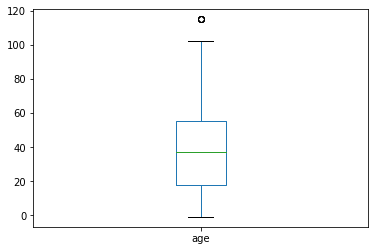

In [51]:
# Try Boxplot chart to find any more outliers in age column:
df_medical['age'].plot(kind='box');

- Now we found another point marked as an outlier with a value of 115 years old, so we must drop both points from data (-1 & 115 Year).

In [52]:
df_medical = df_medical[(df_medical.age >= 0) & (df_medical.age <= 110)]
df_medical.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,case_severity,waiting_time
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034,0.321731,9.183721
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876,0.631381,15.255082
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172457e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,178.000000


- Still, we have a problem, there is no logic age value with zero so it must drop from data, so we will repeat the last code again.

In [53]:
df_medical = df_medical[(df_medical.age > 0) & (df_medical.age <= 110)]
df_medical.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,case_severity,waiting_time
count,1.069820e+05,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472801e+14,5.675434e+06,38.312501,0.101036,0.203773,0.074246,0.031407,0.022938,0.323269,0.332364,9.166645
std,2.558251e+14,7.133307e+04,22.460622,0.301377,0.402804,0.262172,0.174416,0.164010,0.467727,0.638975,15.263557
min,3.921700e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.173028e+12,5.640489e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.171698e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.433627e+13,5.725635e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,178.000000


- Finally, we get clean data for the age column.

## 4. Exploratory Data Analysis

> Now we're ready to move on to exploration & compute statistics and create visualizations.


   [back to top](#Table-of-Contents)

- First, we'll draw a histogram & scatter diagram for all data (canceling for patient_id & appointment_id) to understand data more and find if there is any relationship that occurs.

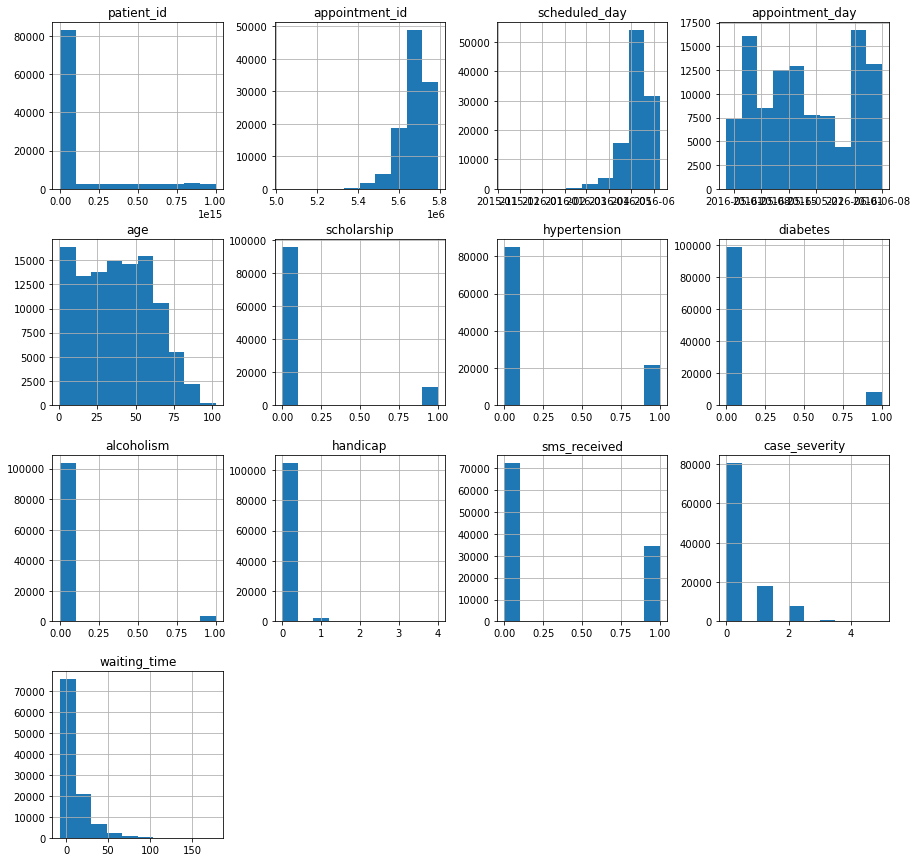

In [54]:
df_medical.hist(figsize=(15,15));

### 4.1. Observation from Histogram
> 1. **Scholarship:**   Most patients haven't a scholarship.        
> 2. **Age:**          Most patients age less than 56 years old (75%) with a mean age of 38 years old. (the Histogram skewed right).
> 3. **Alcoholism:**   Most patients are not alcoholics.
> 4. **Diabetes:**     Most patients are not diabetic.
> 5. **Hypertension:** Most patients did not have hypertension diagnoses.
> 6. **Case Severity:** We had more than one level of case severity according to the combination of diseases, but most of the patients were on the safe side with a case severity of 0.


   [back to top](#Table-of-Contents)

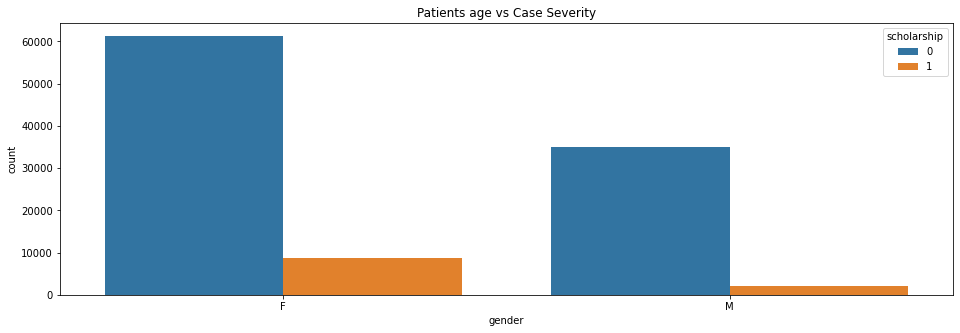

In [55]:
# showing case_severity according to gender column:
plt.figure(figsize = [16,5])
show_age = sns.countplot(x=df_medical.gender, hue=df_medical.scholarship, data=df_medical)
show_age.set_title("Patients age vs Case Severity")
plt.show()

Scholarship indicator between 0 and 1.
- Zero (0) indicates that the patient had not a scholarship system.
- One (1) indicates that the patient is involved in the scholarship system.

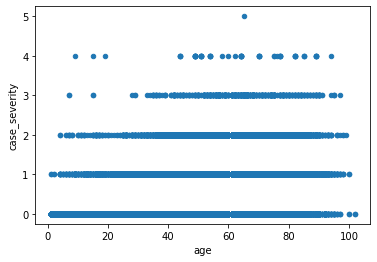

In [56]:
# Estimate if there is a relation between case_severity & patient age:
df_medical.plot(x= 'age', y='case_severity', kind='scatter');

- That indicates most of the severe cases were in patients with old age.

All Patient Number   : 106982
Female Patient       : 70113 about 66 % 
Male Patient         : 36869 about 34 % 


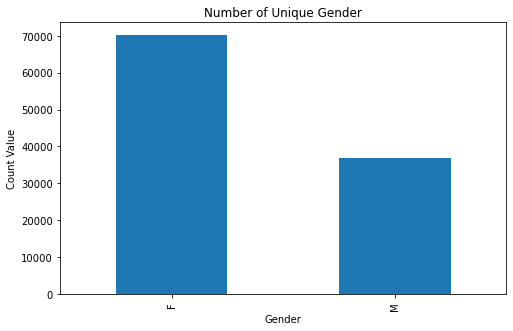

In [57]:
# Calculation for number of female or male patient
all_gender = df_medical.gender.shape[0]
gender_f = len(df_medical.query('gender == \'F\''))
gender_m = len(df_medical.query('gender == \'M\''))
female_ratio = int(round(gender_f / all_gender*100))
male_ratio = int(round(gender_m / all_gender*100))

print('All Patient Number   : {}'.format(all_gender))
print('Female Patient       : {} about {} % '.format(gender_f,female_ratio))
print('Male Patient         : {} about {} % '.format(gender_m,male_ratio))

df_medical['gender'].value_counts().plot(kind='bar', figsize=(8,5));
plt.title("Number of Unique Gender")
plt.xlabel("Gender")
plt.ylabel("Count Value");

- Now we found that most of the patients were Female 70113 (66%) against Male 36869 (34%) near to be double the mean.

JARDIM CAMBURI     7586
MARIA ORTIZ        5563
RESISTÊNCIA        4235
JARDIM DA PENHA    3851
ITARARÉ            3412
Name: neighborhood, dtype: int64


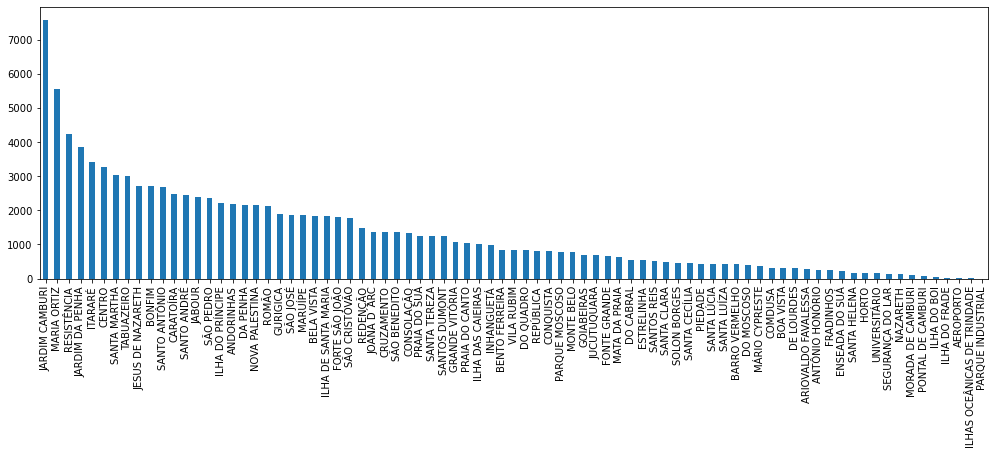

In [58]:
# Estimate top 5 neighbourhood according to patient count.
df_medical['neighborhood'].value_counts().plot(kind='bar', figsize=(17,5));
print(df_medical['neighborhood'].value_counts().iloc[0:5])

From the bar chart, we found that major patient count comes from **JARDIM CAMBURI (7586 Patient)** then from **MARIA ORTIZ (5563 Patient)** neighborhoods, which may indicate bad health habits in them.

### 4.2. Questions

- Now we try to ask some questions to find any relation between our dataset.

### 4.2.2. _Which variable affects the response of patients to attend their appointments?_

In [59]:
# Number of unique value for case_severity and its counts:
df_medical['case_severity'].value_counts()

0    80576
1    18008
2     7710
3      624
4       63
5        1
Name: case_severity, dtype: int64

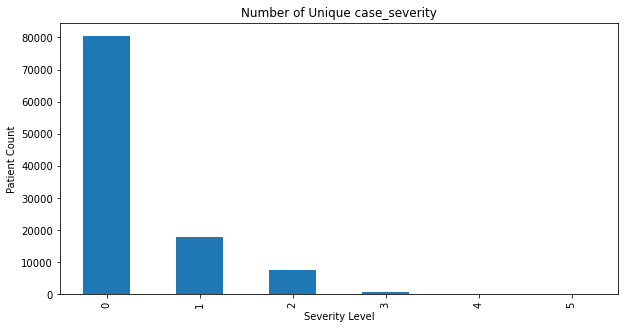

In [60]:
df_medical['case_severity'].value_counts().plot(kind='bar', figsize=(10,5));
plt.title("Number of Unique case_severity")
plt.xlabel("Severity Level")
plt.ylabel("Patient Count");

### 4.2.2.1. Observation for case_severity
> we have six levels of severity depending on the sum value of each disease:
    
> - **Level 0:** This indicates No Severity (patient hadn't any health problems).
> - **Level 1:** This indicates that the patient had one of diabetes, alcoholism, hypertension, or handicap.
> - **Level 2:** This indicates that the patient had one or more of diabetes, alcoholism, hypertension, or handicap.
> - **Level 3:** This indicates that the patient had two or more of diabetes, alcoholism, hypertension, or handicap.
> - **Level 4:** This indicates that the patient had two or more from diabetes, alcoholism, hypertension, or handicap.
> - **Level 5:** may indicate that the patient had more than two of diabetes, alcoholism, hypertension, or handicap.

                                             
      Note: now we can calculate how case severity affects No Show data.
      
      
   [back to top](#Table-of-Contents)

### 4.2.2.2. Patients that Showed up to their appointment & didn't show up?

In [61]:
# Calculation for No Show data 
all_patients = df_medical.no_show.shape[0]
not_showed = len(df_medical.query('no_show == \'Yes\''))
showed_up = len(df_medical.query('no_show == \'No\''))
showed_ratio = int(round(showed_up / all_patients*100))
not_showed_ratio = int(round(not_showed / all_patients*100))

print('All Patient Number         : {}'.format(all_patients))
print('Showd up appointments      : {} about {} % '.format(showed_up,showed_ratio))
print('Not Showd up appointments  : {} about {} % '.format(not_showed,not_showed_ratio))

All Patient Number         : 106982
Showd up appointments      : 85305 about 80 % 
Not Showd up appointments  : 21677 about 20 % 


_- That indicates most of the patients (80%), do not miss their appointments._

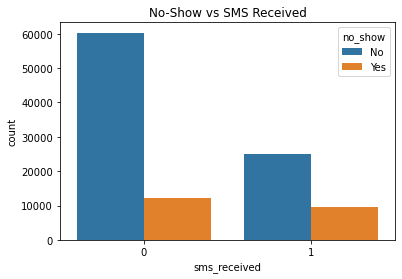

In [62]:
# No Show data vs sms_received:
show_data = sns.countplot(x=df_medical.sms_received, hue=df_medical.no_show, data=df_medical)
show_data.set_title("No-Show vs SMS Received")

plt.show();

- From this chart, it seems that no matter if they received an SMS message or not to attend their appointments. 
- The number of patients that did not miss their appointments also, did not receive SMS messages.

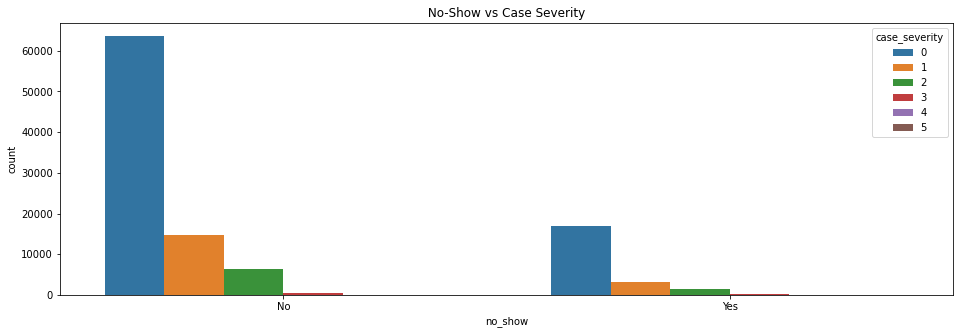

In [63]:
# relation between case_severity & no_show data
plt.figure(figsize = [16,5])
show_severity = sns.countplot(x=df_medical.no_show, hue=df_medical.case_severity, data=df_medical)
show_severity.set_title(" No-Show vs Case Severity ")

plt.show();

- It appears that case severity did not affect on no_show data

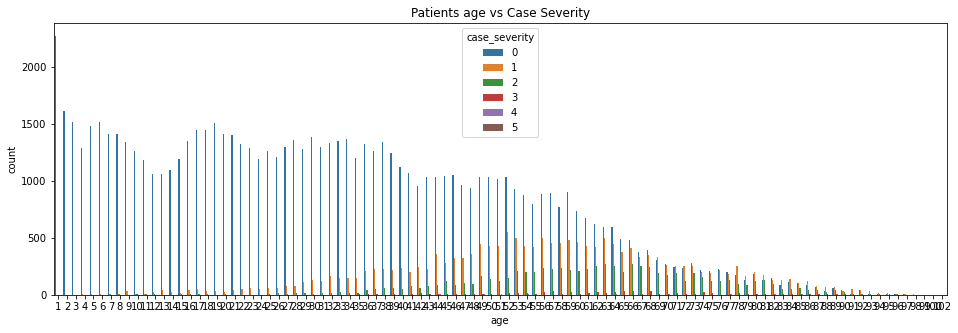

In [64]:
# No Show data vs Patient age
plt.figure(figsize = [16,5])
show_age = sns.countplot(x=df_medical.age, hue=df_medical.case_severity, data=df_medical)
show_age.set_title("Patients age vs Case Severity")
plt.show()

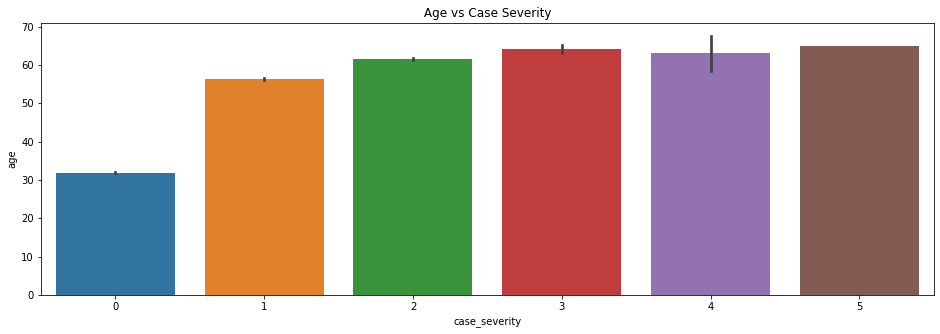

In [65]:
# case_severity vs Patient age
plt.figure(figsize = [16,5])
sns.barplot(data=df_medical, x='case_severity', y='age')
plt.title(" Age vs Case Severity ")
plt.show()

- From both above charts, it appears that case severity increase with going old.

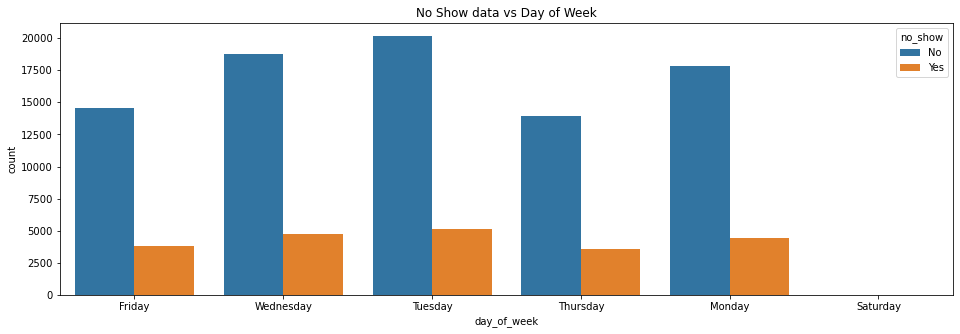

In [66]:
# No Show data against day of week:
plt.figure(figsize = [16,5])
sns.countplot(x=df_medical.day_of_week, hue=df_medical.no_show, data=df_medical)
plt.title("No Show data vs Day of Week")

plt.show();

- As shown before Tuesday was the most day in several patients for no-show data even it was yes or no.

### 4.2.3. Which factor affects waiting_time if patient gender, patient age, or case_severity?

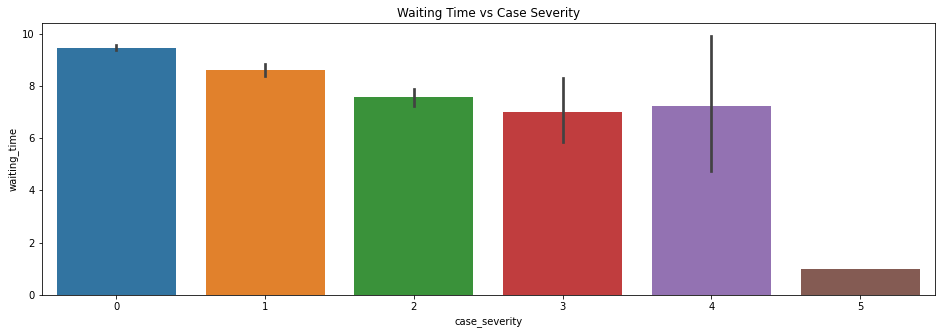

In [67]:
# Case_Severity vs Waiting Time: 
plt.figure(figsize = [16,5])
sns.barplot(data=df_medical, x='case_severity', y='waiting_time')
plt.title("Waiting Time vs Case Severity")
plt.show()

- From the chart above it seems that as case severity increases average waiting time decreases, so we can decide that waiting time is inversely proportional with case severity.

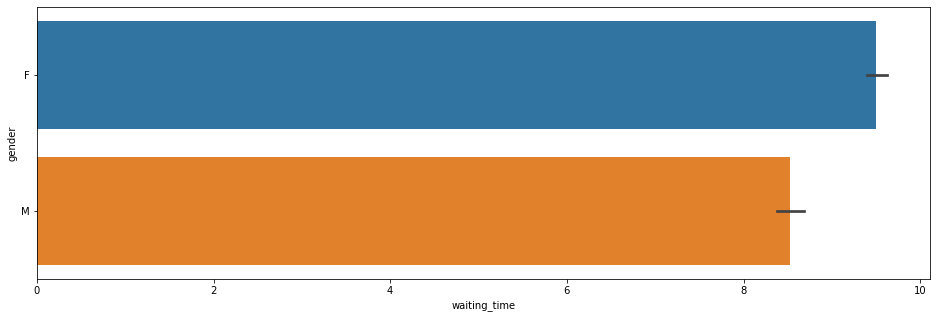

In [68]:
# Relation between waiting_time & gender of patient
plt.figure(figsize = [16,5])
sns.barplot(data=df_medical, x='waiting_time', y='gender')
plt.show()

- It seems that gender of patient affect waiting time as shown in above chart male patient has a waiting time less than female patient.

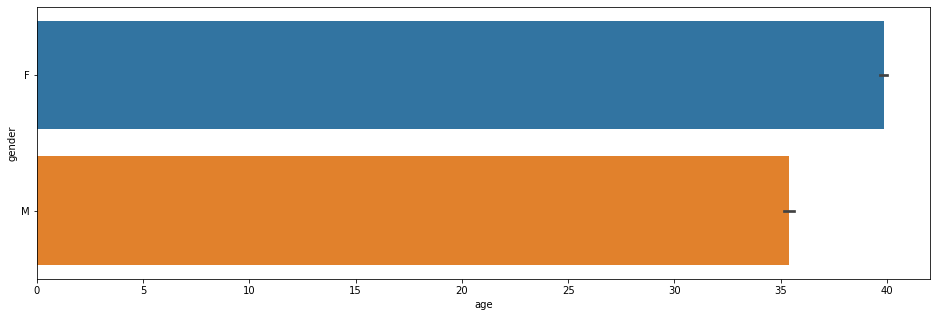

In [69]:
# Drwing average Patient age aganist patient gender
plt.figure(figsize = [16,5])
sns.barplot(data=df_medical, x='age', y='gender')
plt.show()

- Even average age for males (around 35 years) is less than the average age for females (around 40 years), waiting time for males less than it for females.

In [70]:
print('Total Number of Patient Id            :'  , df_medical.patient_id.shape[0])
print('Number of Unique Value for Patient ID : ' , df_medical.patient_id.nunique())

Total Number of Patient Id            : 106982
Number of Unique Value for Patient ID :  60268


- This indicates that some of the patients revisited Hospital more than one time.

In [71]:
df_medical.patient_id.value_counts().iloc[0:30]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
75797461494159     62
258424392677       62
871374938638855    62
6264198675331      62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
65433599726992     46
14479974122994     46
81894521843749     42
9452745294842      42
188232341789524    40
9496196639835      38
2271579924275      38
13364929297498     37
1484143378533      35
88834999836575     34
986162815579582    34
712458866975343    33
416755661551767    30
6128878448536      30
81213966782532     29
8634164126317      24
1198157171975      23
Name: patient_id, dtype: int64

> - For the top 30 patients ID, the number of appointments was between 88 to 23, which means a load for medical staff and cruddy to do all checks required in the same day, so this repetition may occur because patients do all checks required in more than one appointment.
> - Also, this may be a reason for the No Show data.

### 4.2.4. Does duplicates in the patient_id column affect data calculation?

In [72]:
df_revised = df_medical.drop_duplicates(subset='patient_id', keep='first', inplace=False, ignore_index=False)
print(df_revised.shape)
df_revised.describe()

(60268, 17)


,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,case_severity,waiting_time
count,6.026800e+04,6.026800e+04,60268.000000,60268.000000,60268.000000,60268.000000,60268.000000,60268.000000,60268.000000,60268.000000,60268.000000
mean,1.470598e+14,5.665281e+06,37.938773,0.095523,0.203109,0.073273,0.024988,0.020757,0.329180,0.322128,10.094611
std,2.546823e+14,7.404930e+04,22.918272,0.293939,0.402317,0.260586,0.156091,0.157502,0.469919,0.628843,16.394042
min,3.921700e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,4.177386e+12,5.630056e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.199151e+13,5.672020e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.484866e+13,5.715911e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,178.000000


In [73]:
# Calculation for No Show data 
all_patients_r = df_revised.no_show.shape[0]
n_showed_r = len(df_revised.query('no_show == \'Yes\''))
showed_up_r = len(df_revised.query('no_show == \'No\''))
showed_ratio_r = int(round(showed_up / all_patients*100))
n_showed_ratio_r = int(round(not_showed / all_patients*100))

print('All Patient Number         : {}'.format(all_patients_r))
print('Showd up appointments      : {} about {} % '.format(showed_up_r,showed_ratio_r))
print('Not Showd up appointments  : {} about {} % '.format(n_showed_r,n_showed_ratio_r))

All Patient Number         : 60268
Showd up appointments      : 48463 about 80 % 
Not Showd up appointments  : 11805 about 20 % 


_- From the above calculation, we found that result was the same as before without any difference._

## 5. Final Conclusions

> - After loading the dataset, wrangling, cleaning, and starting visualization we reach to final conclusion for this data from our opinion may conclusion be different from one to another depending on the method of investigation but I'm sure we will meet at some points.
> - To get more accuracy to our investigation we create a new column with the name of case_severity which is the sum of 4 columns (Diabetes, Hypertension, Alcoholism, and Handicap) we think this be more efficient than study individual disease.
> 
> - Finally, let us go to a final conclusion:

### 5.1. Limitations of Data

1. This data was considered as small data contains only 110527 rows and 14 columns of data, we had 60268 rows if we remove all duplicated data.
2. We have incomplete data because there is no column indicating how much time passed between a visit scheduling time & actual visit time.
3. Column of appointment_day has no hour specified so we can not calculate waiting_time accurately (estimated from hour in scheduled_day column to 00:00:00 hour in appointed_day).
4. For the duplicated visits of some patients we did not know why they revisit the hospital and what test they do in this visit.
5. No data enough about how much patients stay in hospital and if they had taken full medical care or had not if patients stay in hospital for a few hours or days.


   [back to top](#Table-of-Contents)


### 5.2. Conclusions about data

1. **Hospitals:** 
> - Hospitals received patients only six days a week (Monday, Tuesday, Wednesday, Thursday, Friday & Saturday) and it was off on Sunday with zero patients, most days in the patient visit were Tuesday (26168 patients) also, fewer days was Saturday (24 patients only).
> - Most visits to hospitals were recorded JARDIM CAMBURI (7586 visits) then MARIA ORTIZ (5563 visits).
2. **Patient:** we study the gender and age of patients
> - A total number of the patient were 106982 patients count Female patients ( 70113 patients -- 66%), and the count of Male patients were (36869 patients -- 34%).
> - The average age for patients was about 38 years old, the youngest patients with age 1 year and oldest one were 102 years only( this after cleaning for outliers in age column).
> - From the patient_id column there are revisits for some patients there are 60268 unique values, some patients revisit the hospital up to 88 times.
3. **Case Severity:** --column which we create--
> - We have six levels for case severity most of the patient were in level 0 (80576 patients) this indicate good healthy habits, also, we had only one patient in level 5, all of this with a good indication for patient health.
> - We reach this because most patients were not diabetes, not hypertension, not a handicap, or not alcoholism as shown in Histogram.
> - We found that case_severity increase with age and it is natural.



   [back to top](#Table-of-Contents)

### 5.3. Answer for Questions

1. Answer to question (1): which variable affects the response of patients to attend their appointments?
> We fount that most of the patient attend their appointments (85305 patients -- 80%), also there are some did not (21677 patient -- 20%), so we need to find reasons for that:
> - We found that it no matter the patient received an SMS message or not to attend their appointment because most of the patients did not receive any message.
> - Also, case_severity did not affect showing their appointments.
> - The only thing that may be the main cause for patients did not show their appointments appear in revisits of patients due to crowded hospital.

2. Answer to question (2): which factor affects waiting_time (patient gender, patient age, or case_severity)?
> - From the bar chart of case_severity against wating_time, we found that as case_severity increase and average of waiting_time decrease (it seems to be inversely proportional).
> - From the bar chart between waiting_time against gender, we can not decide that gender affects waiting_time because counts of females more than male by huge counts near to be double of it.
> - Also for age, it is not logical that males with an average age of about 35 years old had less waiting_time than females with an average age of about 40 years old.
>
> Finally, we can say that case_severity only factor that affects waiting_time.

3. Answer to question (3): does duplicates in the patient_id column affect data calculation?
> - For this, we dropped all duplicated values from the data frame and recalculate some statics we found that no big change in the data percent of Females still 80% and males still 20%.
> - Slight difference in age average it was 38.3 years before delete duplicate values it was 37.94 years after. we can ignore that difference.


   [back to top](#Table-of-Contents)